# GRIP@The Sparks Foundation

# Data Science and Business Analytics- JULY 2022

# Task 1 : Prediction using Supervised Machine Learning

# Name : Ippili Amruta

In this regression task I tried to predict the percentage of an student is expected to score based upon the number of hours they studied.

This is a simple linear regression task as it involves just two variables.

# Technical Stack : Sikit Learn , Numpy Array , Pandas , Matplotlib

# Importing Libraries

In [49]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split


# Loading The Data

In [50]:
df = pd.read_csv("http://bit.ly/w-data")

In [51]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [52]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [53]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [54]:
df.shape

(25, 2)

In [55]:
df.size

50

In [56]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [57]:
df[df.duplicated()]

,Hours,Scores


In [58]:
# Get the initial data with dropping the NA values, used , the name df instead of df, more descriptive 
df = df.dropna()  

#Is any of the values in columns of the df null ? 
print(df.isnull().values.any())

#Get the shape of the dataframe after removing the null values
print (df.shape)

False
(25, 2)


In [59]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 600.0 bytes
None


In [60]:
df.describe

<bound method NDFrame.describe of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

C:\Users\amrut\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


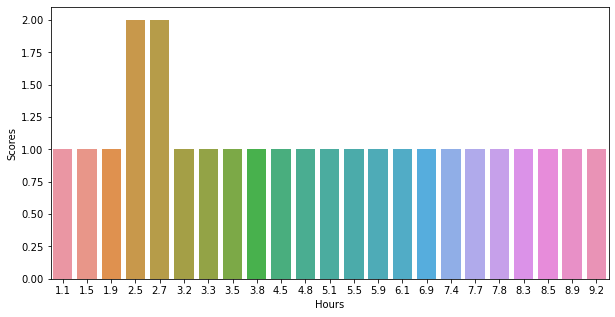

In [61]:
day_label = df.Hours.value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(day_label.index, day_label);
plt.xlabel('Hours')
plt.ylabel('Scores');

# Hours vs Percentage

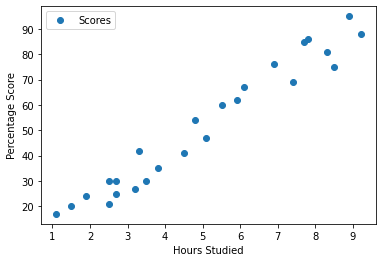

In [62]:
df.plot(x='Hours', y='Scores', style='o')   
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Regression Plot

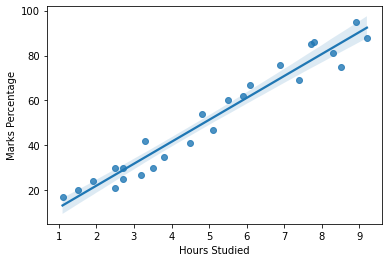

In [63]:
sns.regplot(x= df['Hours'], y= df['Scores'])
plt.ylabel('Marks Percentage')
plt.xlabel('Hours Studied')
plt.show()

# Correlation Matrix

In [64]:
print(df.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


# Defining X and y from the Data

In [65]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

# Train the data

In [66]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [67]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [71]:
pred_y = regressor.predict(X_test)
prediction = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


In [73]:
compare_scores = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Comparing the Predicted values vs actual values

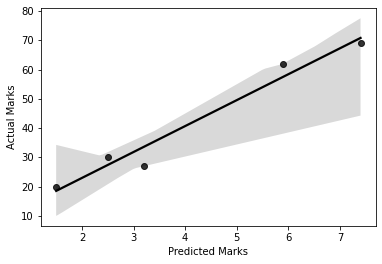

In [80]:
sns.regplot(x=X_test, y=y_test,color="black")
plt.ylabel('Actual Marks')
plt.xlabel('Predicted Marks')
plt.show()

C:\Users\amrut\anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\amrut\anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


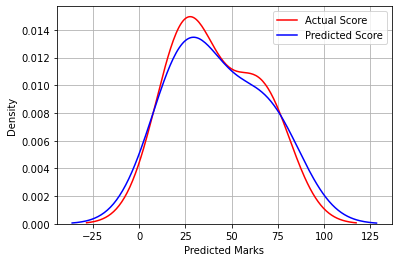

In [93]:
ax1 = sns.distplot(compare_scores["Actual Marks"], hist = False , color = "red" , label = "Actual Score")
sns.distplot(compare_scores["Predicted Marks"] , hist = False , color = "blue" , label = "Predicted Score" , ax = ax1)
plt.legend()
plt.grid()
plt.show()

In [97]:
Y_pred = regressor.predict(X_test)
Y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

# Mean Absolute Error Of the model

In [77]:
from sklearn.metrics import mean_absolute_error
print('Mean absolute error: ',mean_absolute_error(y_test,pred_y))

Mean absolute error:  4.183859899002975


# Accuracy of the model

In [99]:
from sklearn.metrics import r2_score
acc=r2_score(y_test,Y_pred)
print('Accuracy:',acc)

Accuracy: 0.9454906892105356


# Making Predictions


# To Predict - What will be predicted score if a student studies for 9.25 hrs/ day?

In [79]:
hours = [9.25]
result = regressor.predict([hours])
print("Your score will be {}".format(round(result[0],3)))

Your score will be 93.692
